<a href="https://colab.research.google.com/github/messiayan/House-Prices-linear-Regression/blob/main/HOUSE_PRICES_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload CSVs to Colab
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
#Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission_df = pd.read_csv("sample_submission.csv")


In [ ]:
#Quick exploration
print(train_df.head())
print(train_df.columns)
print(train_df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].describe())
print(train_df.isnull().sum())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
#Select features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']  # Square footage, Bedrooms, Bathrooms
target = 'SalePrice'

X = train_df[features]
y = train_df[target]

In [ ]:
#Split data for training and validation
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
#Validate the model
y_pred = model.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")


Validation RMSE: 52975.71771338122


In [ ]:
#Prepare test data
X_test = test_df[features]
X_test = X_test.fillna(X_test.mean())  #Fill missing values
test_predictions = model.predict(X_test)


In [ ]:
#Create submission file
submission_df['SalePrice'] = test_predictions
submission_df.to_csv('submission.csv', index=False)



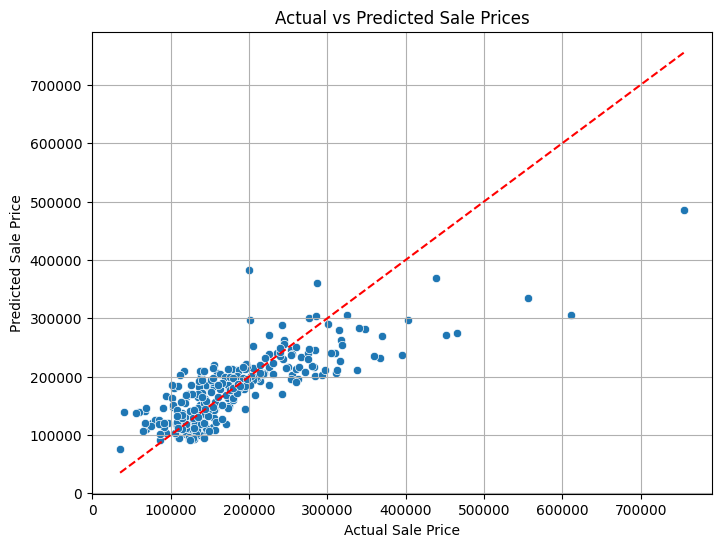

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Diagonal line
plt.grid(True)
plt.show()
